In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

crime_df = pd.read_csv("crime_clean_final.csv")
house_df = pd.read_csv("house_by_postcode_2022.csv")

merged_df = pd.merge(crime_df, house_df, on="POST_CODE")
num_postcodes = len(merged_df["POST_CODE"].unique())

print("Number of common postcodes in both files:", num_postcodes)


Number of common postcodes in both files: 193


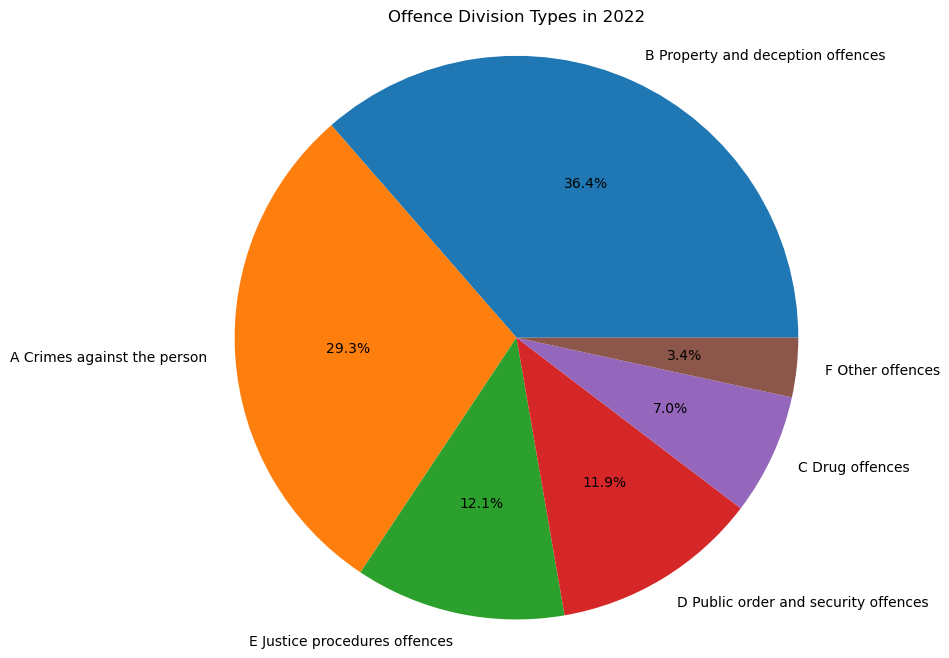

In [9]:
merged_df_2022 = merged_df[merged_df["Year"] == 2022]

offence_division_counts = merged_df_2022["Offence Division"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(offence_division_counts, labels=offence_division_counts.index, autopct='%1.1f%%')
plt.title("Offence Division Types in 2022")
plt.axis('equal')
plt.savefig("fig1_offence_division_types_2022",bbox_inches="tight")
plt.show()


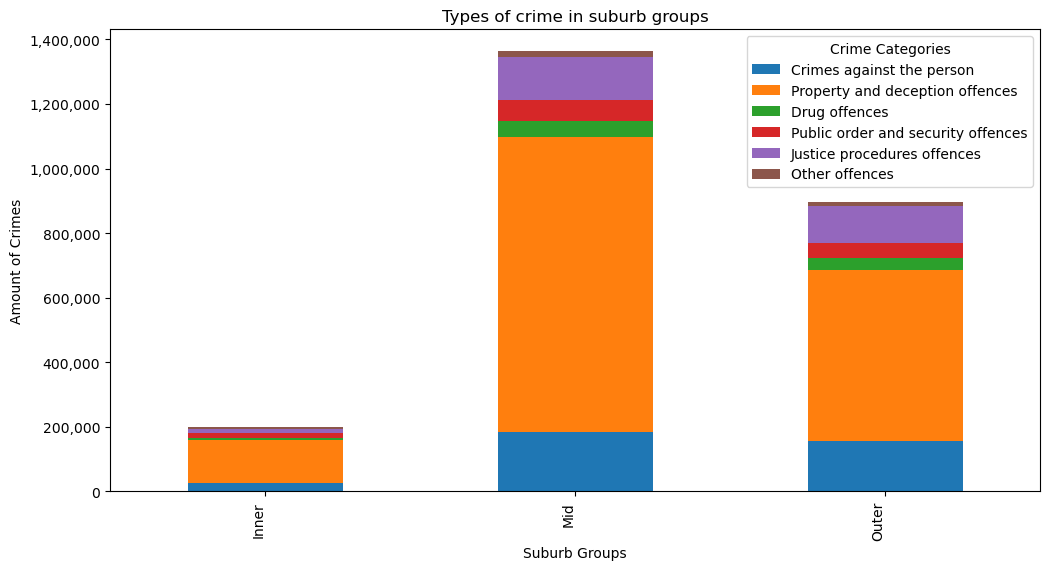

In [10]:
import matplotlib.ticker as ticker

Median_Crime_df = pd.read_csv("House median and crime.csv")

grouped_data = Median_Crime_df.groupby("SUBURB_GROUP")[["Crimes against the person", "Property and deception offences",
                                            "Drug offences", "Public order and security offences",
                                            "Justice procedures offences", "Other offences"]].sum()

colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown"]

grouped_data.plot(kind="bar", stacked=True, colormap=plt.cm.colors.ListedColormap(colors), figsize=(12, 6))
plt.title("Types of crime in suburb groups")
plt.xlabel("Suburb Groups")
plt.ylabel("Amount of Crimes")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Crime Categories")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("fig2_types_crime_suburb_group.png",bbox_inches = "tight")
plt.show()


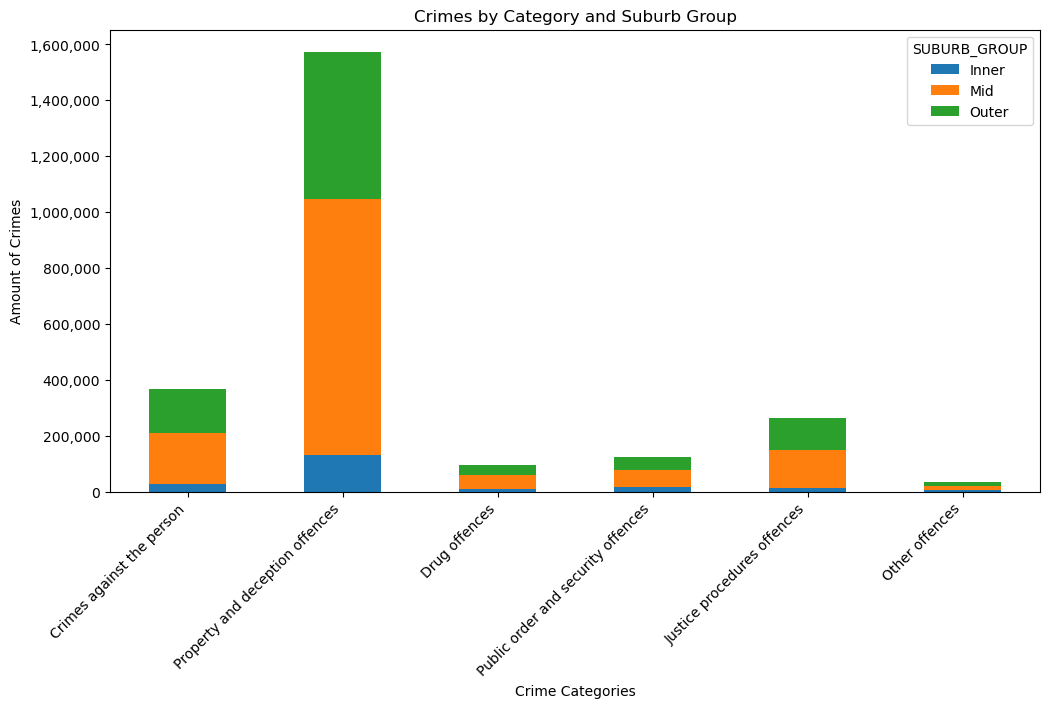

In [11]:
grouped_data.T.plot(kind="bar", stacked=True, color=colors, figsize=(12, 6))
plt.title("Crimes by Category and Suburb Group")
plt.xlabel("Crime Categories")
plt.ylabel("Amount of Crimes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="SUBURB_GROUP")

plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.savefig("fig3_crime_category_by_suburb_group.png",bbox_inches="tight")
plt.show()


In [12]:
crime_df = pd.read_csv("crime_clean_final.csv")
house_df = pd.read_csv("house_by_postcode_2022.csv")

print("crime_df columns:", crime_df.columns)
print("house_df columns:", house_df.columns)

crime_df columns: Index(['POST_CODE', 'MUNICIPALITY', 'CITY_SHIRE', 'SUBURB_GROUP', 'Year',
       'Offence Division', 'Offence Subdivision', 'Offence Subgroup',
       'Incidents Recorded', 'SUBURB_NAMES'],
      dtype='object')
house_df columns: Index(['POST_CODE', 'MUNICIPALITY', 'CITY_SHIRE', 'SUBURB_GROUP',
       'SUBURB_NAMES', '2022'],
      dtype='object')
